### **Prediction using Supervised ML (Simple Linear Regression):**
**-Tanay Sawant**


### **Required Libraries:** 

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split  


### **Importing the dataset:**

In [19]:
dat=pd.read_csv("StudyHours.csv")
dat.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Data Plotting:**

Plotting the given data to see if any linear relationship exists between the number of hours studied by the student and their corresponding score achieved.

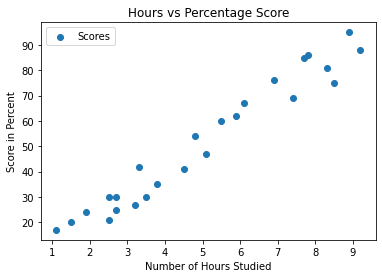

In [20]:
# Plot for checking correlation.

plt.scatter(dat["Hours"], dat["Scores"],label="Scores")
plt.title('Hours vs Percentage Score')
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Score in Percent')  
plt.legend(loc=0)
plt.show()


From the above scatterplot, we can clearly see that there exists a linear relationship in the data. Hence we go ahead with the linear regression model for prediction.

### **Data Preparation:**
Preparing the data for model training.

In [21]:
x = dat.iloc[:, :-1].values  
y = dat.iloc[:, 1].values 

With the help of sci-kit learn's train_test_split built in function, we split the data into training and testing datasets with the split ratio of 80:20 (80% for training and 20% for testing). We keep the random state value as 1234.

In [22]:
# Splitting the data into training and test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=123) 

### **Model Training and Fitting:**

We fit the model using the built in LinearRegression function form sklearn to train our model for model prediction.

In [23]:
# Fitting a linear regression model.
model= LinearRegression()  
model.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Fitted Model Plotting:**

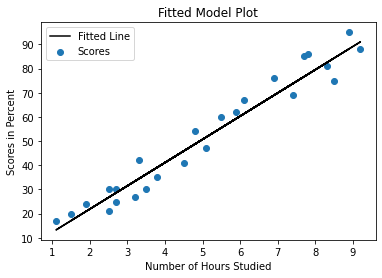

In [24]:
# Plotting the fitted model line.
fitted_model = model.coef_*x + model.intercept_
plt.scatter(x, y,label="Scores")
plt.plot(x, fitted_model,label="Fitted Line",c="black");
plt.title("Fitted Model Plot")
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Scores in Percent')  
plt.legend(loc=0)
plt.show()

From the above plot, it is clear that our model is giving a proper fit with linear regression. 

### **Prediction using Trained Model:**
Now that we have trained the model, we use that trained model to use for predicting some of the values using the test set.

In [25]:
# Prediction on the test set.
y_pred = model.predict(x_test)

### **Actual v/s Predicted:**

In [26]:
# Comparison between the Actual scores and the Predicted scores.
df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores':y_pred})  
print(df)

   Actual Scores  Predicted Scores
0             20         17.097967
1             54         48.783639
2             35         39.181920
3             67         61.265873
4             95         88.150686


From the above dataframe, it is clearly visible that the predicted scores are somewhat similar to the actual scores of the students.
This ensures that our model is giving us good predicted scores.

### **What is the prediction when Study Hours is 9.25?**

In [27]:
# Prediction of the score for the given study hours.
val=pd.Series(9.25)
pred_val=model.predict(val.values.reshape(1,-1))
print("The Predicted Score of a student when the student studies for 9.25 hours is {0}".format(round(pred_val[0],2)))

The Predicted Score of a student when the student studies for 9.25 hours is 91.51


### **Model Evaluation:**

In [28]:
# Evaluating the model.
print("Adjusted R Square:",
      metrics.r2_score(y_test,y_pred)) 

Adjusted R Square: 0.9605221627526418


With the above metrics we use them to evaluate how our model is performing. 
From the Adjusted R Square value, we can say that our model is explaining approximately 96% variation in the data. We know that the closer this value is to 100, the accurate the model is performing. Hence, we can say that our model is giving good results.